# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# Loading datasets

In [6]:
data_test = pd.read_csv(r'E:\AB testing\test_group.csv')

In [7]:
data_test.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Test Campaign;1.08.2019;3008;39550;35820;3038;...
1,Test Campaign;2.08.2019;2542;100719;91236;4657...
2,Test Campaign;3.08.2019;2365;70263;45198;7885;...
3,Test Campaign;4.08.2019;2710;78451;25937;4216;...
4,Test Campaign;5.08.2019;2297;114295;95138;5863...


# data cleaning

In [9]:
data_test[['Campaign Name','Date','Spend_USD','Number of Impressions','Reach','Number of Website Clicks',
        'Number of Searches','Number of View Content','Number of Add to Cart','Number of Purchase']]=data_test['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'].str.split(';',expand=True)
data_test = data_test.drop(['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'],axis=1)
data_test = data_test.reset_index(drop=True)
data_test.head()

,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Campaign Name             30 non-null     object
 1   Date                      30 non-null     object
 2   Spend_USD                 30 non-null     object
 3   Number of Impressions     30 non-null     object
 4   Reach                     30 non-null     object
 5   Number of Website Clicks  30 non-null     object
 6   Number of Searches        30 non-null     object
 7   Number of View Content    30 non-null     object
 8   Number of Add to Cart     30 non-null     object
 9   Number of Purchase        30 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [11]:
#change datatypes
data_test['Date'] = pd.to_datetime(data_test['Date'], format='%d.%m.%Y')
data_test.iloc[:,2:10] = data_test.iloc[:,2:10].apply(pd.to_numeric)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Campaign Name             30 non-null     object        
 1   Date                      30 non-null     datetime64[ns]
 2   Spend_USD                 30 non-null     int64         
 3   Number of Impressions     30 non-null     int64         
 4   Reach                     30 non-null     int64         
 5   Number of Website Clicks  30 non-null     int64         
 6   Number of Searches        30 non-null     int64         
 7   Number of View Content    30 non-null     int64         
 8   Number of Add to Cart     30 non-null     int64         
 9   Number of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


C:\Users\Acer\AppData\Local\Temp\ipykernel_29720\458201182.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_test.iloc[:,2:10] = data_test.iloc[:,2:10].apply(pd.to_numeric)


In [12]:
data_test.describe()

,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [15]:
#for data _control
data_control = pd.read_csv(r'E:\AB testing\control_group.csv')

In [16]:
data_control.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Control Campaign;1.08.2019;2280;82702;56930;70...
1,Control Campaign;2.08.2019;1757;121040;102513;...
2,Control Campaign;3.08.2019;2343;131711;110862;...
3,Control Campaign;4.08.2019;1940;72878;61235;30...
4,Control Campaign;5.08.2019;1835;;;;;;;


In [17]:
data_control[['Campaign Name','Date','Spend_USD','Number of Impressions','Reach','Number of Website Clicks',
        'Number of Searches','Number of View Content','Number of Add to Cart','Number of Purchase']]=data_control['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'].str.split(';',expand=True)
data_control = data_control.drop(['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'],axis=1)
data_control = data_control.reset_index(drop=True)
data_control.head()

,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,5.08.2019,1835,,,,,,,


In [18]:
data_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Campaign Name             30 non-null     object
 1   Date                      30 non-null     object
 2   Spend_USD                 30 non-null     object
 3   Number of Impressions     30 non-null     object
 4   Reach                     30 non-null     object
 5   Number of Website Clicks  30 non-null     object
 6   Number of Searches        30 non-null     object
 7   Number of View Content    30 non-null     object
 8   Number of Add to Cart     30 non-null     object
 9   Number of Purchase        30 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [21]:
#change datatypes
data_control['Date'] = pd.to_datetime(data_control['Date'], format='%d.%m.%Y')
#data_control.iloc[:,2:10] = data_control.iloc[:,2:10].apply(pd.to_numeric)

data_control[data_control.columns[2:10]] = data_control[data_control.columns[2:10]].apply(pd.to_numeric)
data_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Campaign Name             30 non-null     object        
 1   Date                      30 non-null     datetime64[ns]
 2   Spend_USD                 30 non-null     float64       
 3   Number of Impressions     30 non-null     float64       
 4   Reach                     30 non-null     float64       
 5   Number of Website Clicks  30 non-null     float64       
 6   Number of Searches        30 non-null     float64       
 7   Number of View Content    30 non-null     float64       
 8   Number of Add to Cart     30 non-null     float64       
 9   Number of Purchase        30 non-null     float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 2.5+ KB


In [22]:
data_control[data_control.columns[2:10]] = data_control[data_control.columns[2:10]].apply(pd.to_numeric)

In [23]:
#There is a row with missing values. Let's fill the missing values with K-Nearest Neighbor.
imputer = KNNImputer(weights='distance')
data_control.iloc[:,2:10]=pd.DataFrame(imputer.fit_transform(data_control.iloc[:,2:10]))

In [24]:
data_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Campaign Name             30 non-null     object        
 1   Date                      30 non-null     datetime64[ns]
 2   Spend_USD                 30 non-null     float64       
 3   Number of Impressions     30 non-null     float64       
 4   Reach                     30 non-null     float64       
 5   Number of Website Clicks  30 non-null     float64       
 6   Number of Searches        30 non-null     float64       
 7   Number of View Content    30 non-null     float64       
 8   Number of Add to Cart     30 non-null     float64       
 9   Number of Purchase        30 non-null     float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 2.5+ KB


In [25]:
data_control.describe()

,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,109218.702653,88556.211539,5334.545278,2218.839919,1943.781458,1302.117685,525.324533
std,367.334451,21393.408777,21510.834457,1728.445776,851.133358,764.021910,400.539188,182.338435
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,93853.769896,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2299.500000,112368.000000,91418.000000,5329.500000,2340.000000,1979.500000,1351.265280,506.000000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [26]:
#Combine two datasets into one and add new features for metrics evaluation
data = pd.concat([data_test,data_control])
data = data.reset_index()
data['USD Spend per Purchase'] = round(data['Spend_USD']/data['Number of Purchase'],2)
data['CTR(%)'] = round(data['Number of Website Clicks']*100/data['Number of Impressions'],2)
data['Conversion Rate(%)'] = round(data['Number of Purchase']*100/data['Number of Website Clicks'],2)

In [27]:
data.head()

,index,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase,USD Spend per Purchase,CTR(%),Conversion Rate(%)
0,0,Test Campaign,2019-08-01,3008.0,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,11.80,7.68,8.39
1,1,Test Campaign,2019-08-02,2542.0,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0,3.75,4.62,14.54
2,2,Test Campaign,2019-08-03,2365.0,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0,4.09,11.22,7.33
3,3,Test Campaign,2019-08-04,2710.0,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0,7.97,5.37,8.06
4,4,Test Campaign,2019-08-05,2297.0,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0,2.99,5.13,13.10


In [28]:
data.tail()

,index,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase,USD Spend per Purchase,CTR(%),Conversion Rate(%)
55,25,Control Campaign,2019-08-26,2233.0,124897.0,98432.0,5435.0,2847.0,2421.0,1448.0,251.0,8.90,4.35,4.62
56,26,Control Campaign,2019-08-27,2061.0,104678.0,91579.0,4941.0,3549.0,3249.0,980.0,605.0,3.41,4.72,12.24
57,27,Control Campaign,2019-08-28,2421.0,141654.0,125874.0,6287.0,1672.0,1589.0,1711.0,643.0,3.77,4.44,10.23
58,28,Control Campaign,2019-08-29,2375.0,92029.0,74192.0,8127.0,4891.0,4219.0,1486.0,334.0,7.11,8.83,4.11
59,29,Control Campaign,2019-08-30,2324.0,111306.0,88632.0,4658.0,1615.0,1249.0,442.0,670.0,3.47,4.18,14.38


In [29]:
data.describe()

,index,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase,USD Spend per Purchase,CTR(%),Conversion Rate(%)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,14.500000,2425.750000,91901.751326,71023.889103,5683.439306,2318.903293,1900.890729,1091.825509,523.278933,5.443167,7.679833,10.336833
std,8.728484,381.130461,32203.529695,30783.114485,1739.855353,663.729441,681.437585,428.032848,195.548610,2.502151,5.586975,5.760707
min,0.000000,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000,2.250000,1.860000,3.010000
25%,7.000000,2073.750000,69558.250000,43235.500000,4230.750000,1970.750000,1249.000000,863.250000,340.000000,3.467500,4.315000,6.345000
50%,14.500000,2420.500000,97585.539791,77422.000000,5712.179177,2374.500000,1959.221864,1082.500000,506.000000,4.705000,6.075000,8.830000
75%,22.000000,2727.500000,117160.500000,95314.250000,7201.250000,2755.750000,2422.500000,1384.250000,685.000000,7.490000,8.435000,13.025000
max,29.000000,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000,12.700000,33.820000,32.240000


# Data Visualization

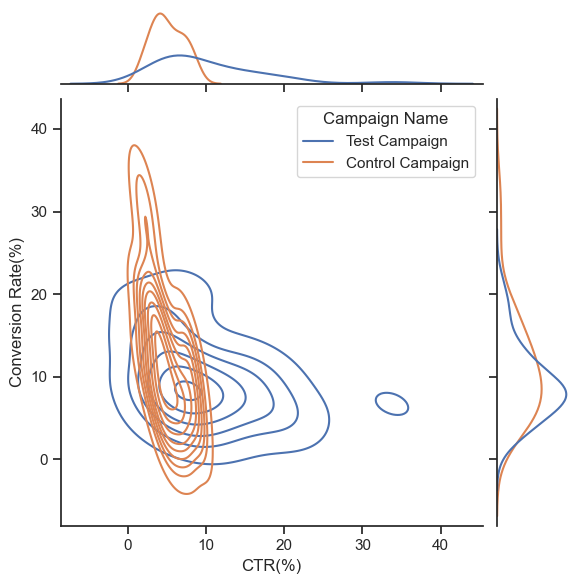

In [41]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=data,
    x="CTR(%)", y="Conversion Rate(%)", hue="Campaign Name",
    kind="kde",
)
plt.show()

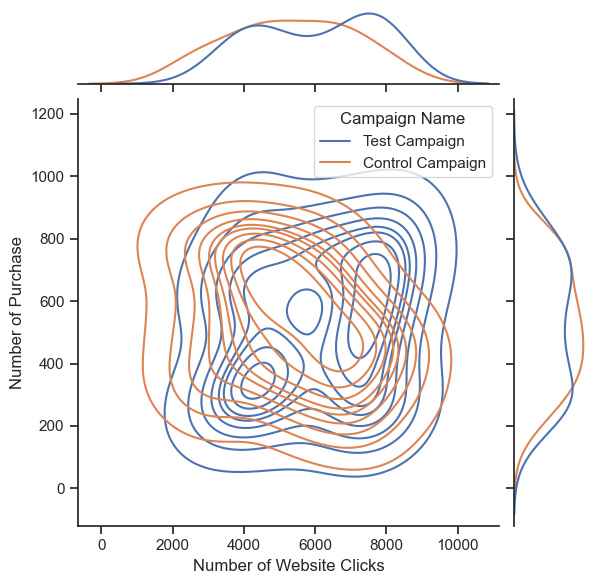

In [34]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=data,  # Corrected parameter name
    x="Number of Website Clicks", y="Number of Purchase", hue="Campaign Name",
    kind="kde",
)
plt.show()

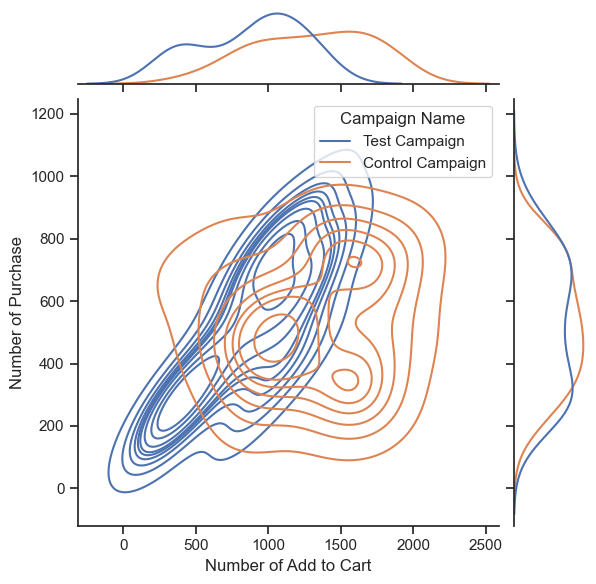

In [43]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=data,
    x="Number of Add to Cart", y="Number of Purchase", hue="Campaign Name",
    kind="kde",
)
plt.show()

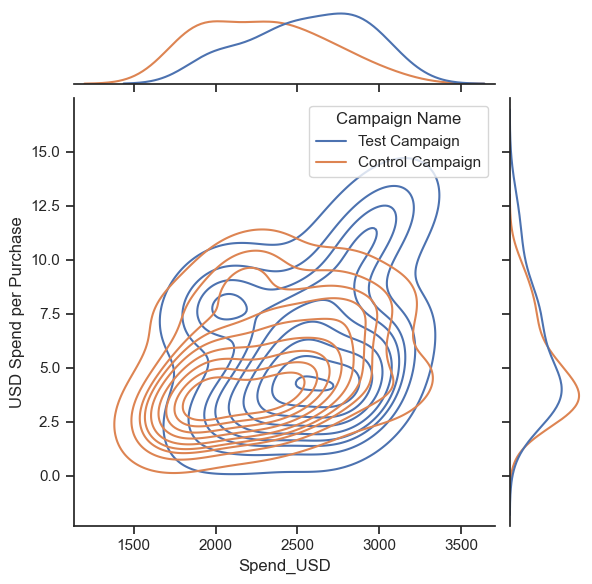

In [44]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=data,
    x="Spend_USD", y="USD Spend per Purchase", hue="Campaign Name",
    kind="kde",
)
plt.show()

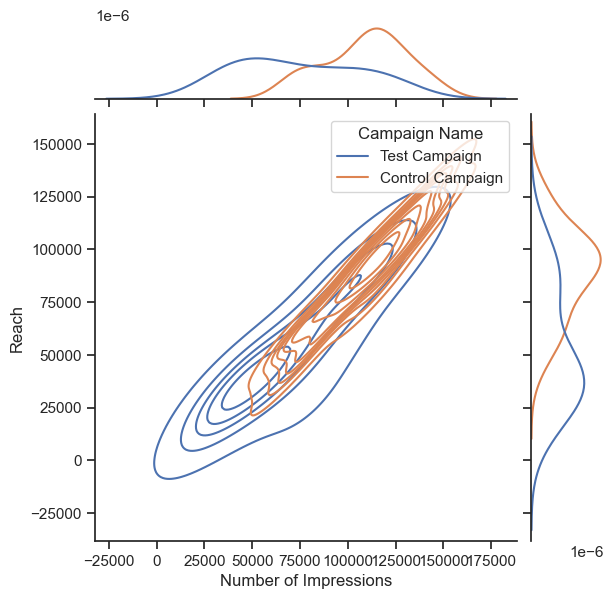

In [45]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=data,
    x="Number of Impressions", y="Reach", hue="Campaign Name",
    kind="kde",
)
plt.show()

In [46]:
total_spend = data.groupby(['Campaign Name'])['Spend_USD'].sum().reset_index()
total_spend

,Campaign Name,Spend_USD
0,Control Campaign,68653.0
1,Test Campaign,76892.0


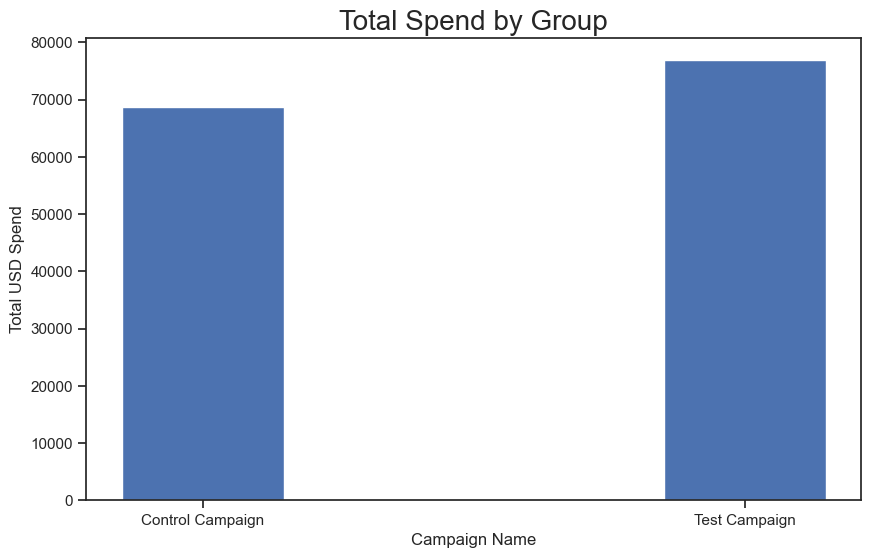

In [47]:
fig = plt.figure(figsize = (10, 6))
plt.bar(total_spend['Campaign Name'], total_spend['Spend_USD'], width = 0.3)
plt.xlabel("Campaign Name")
plt.ylabel("Total USD Spend")
plt.title("Total Spend by Group", fontdict = {'fontsize' : 20})
plt.show()

In [48]:
spend_per_purchase = data.groupby(['Campaign Name'])['USD Spend per Purchase'].mean().reset_index()
spend_per_purchase

,Campaign Name,USD Spend per Purchase
0,Control Campaign,4.986333
1,Test Campaign,5.900000


In [49]:
spend_per_purchase_uplift = (5.900000-4.986333)/4.986333
spend_per_purchase_uplift

0.1832342525057994

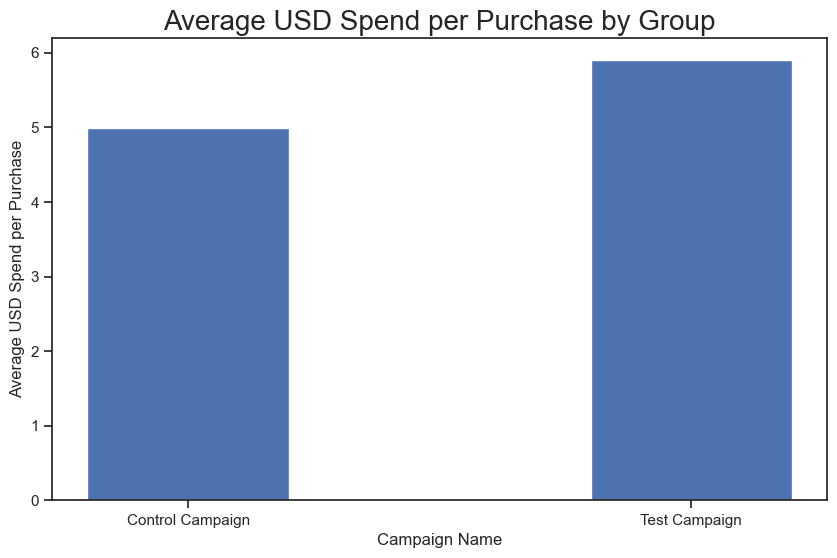

In [50]:
fig = plt.figure(figsize = (10,6))
plt.bar(spend_per_purchase['Campaign Name'], spend_per_purchase['USD Spend per Purchase'], width = 0.4)
plt.xlabel("Campaign Name")
plt.ylabel("Average USD Spend per Purchase")
plt.title("Average USD Spend per Purchase by Group", fontdict = {'fontsize' : 20})
plt.show()

In [51]:
num_of_purchase = data.groupby(['Campaign Name'])['Number of Purchase'].sum().reset_index()
num_of_purchase

,Campaign Name,Number of Purchase
0,Control Campaign,15759.735991
1,Test Campaign,15637.000000


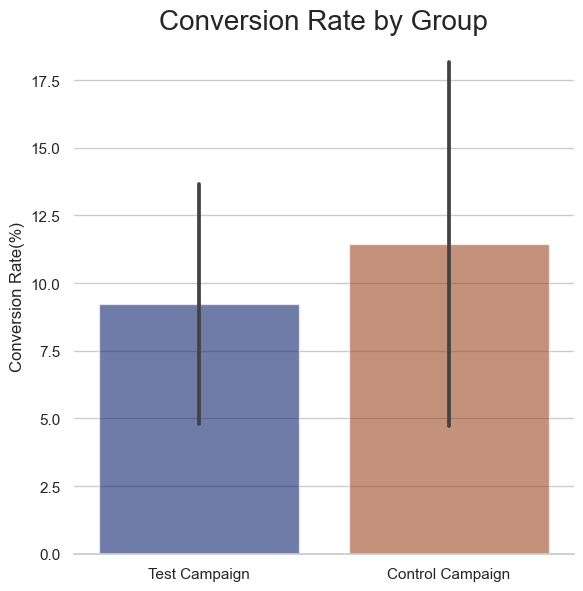

In [54]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar", x="Campaign Name",
    y="Conversion Rate(%)",
    errorbar="sd", palette="dark", alpha=0.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Conversion Rate(%)")
plt.title('Conversion Rate by Group', fontdict={'fontsize': 20})
plt.show()

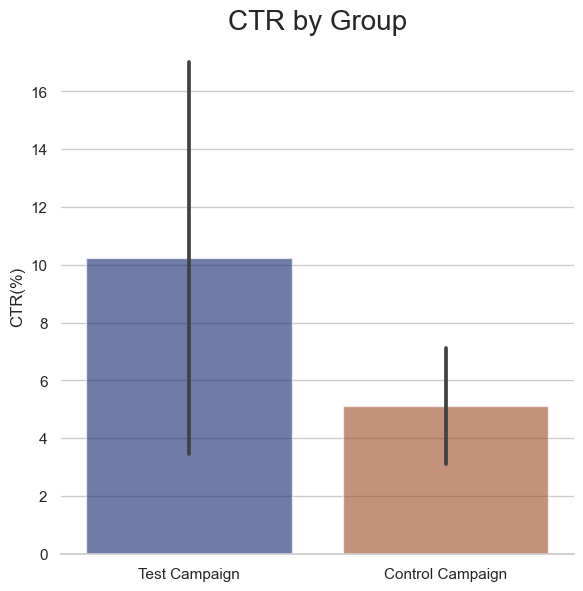

In [57]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar", x="Campaign Name",
    y="CTR(%)",
    errorbar="sd", palette="dark", alpha=0.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "CTR(%)")
plt.title('CTR by Group', fontdict={'fontsize': 20})
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_29720\1342680378.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(


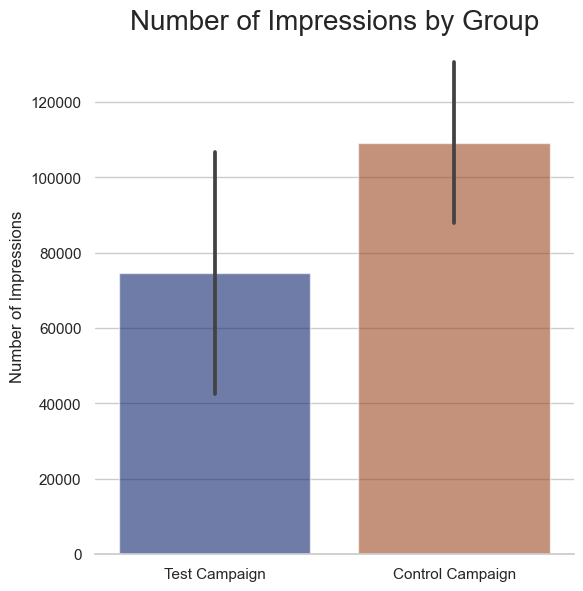

In [58]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",x="Campaign Name",
    y="Number of Impressions",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Number of Impressions")
plt.title('Number of Impressions by Group', fontdict = {'fontsize' : 20})
plt.show()

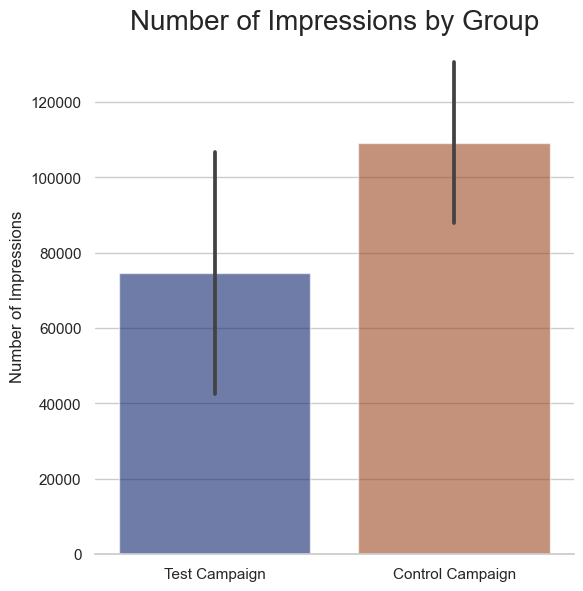

In [59]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar", x="Campaign Name",
    y="Number of Impressions",
    errorbar="sd", palette="dark", alpha=0.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Number of Impressions")
plt.title('Number of Impressions by Group', fontdict={'fontsize': 20})
plt.show()

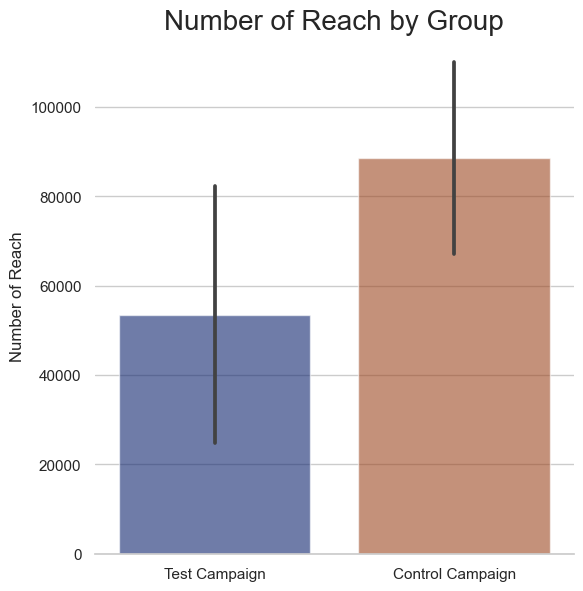

In [62]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar", x="Campaign Name",
    y="Reach",
    errorbar="sd", palette="dark", alpha=0.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Number of Reach")
plt.title('Number of Reach by Group', fontdict={'fontsize': 20})
plt.show()

# Running T test

In [63]:
#plot the data distribution
df_2 = data.copy()
df_2 = df_2.drop(['index','Date'], axis=1)
df_2['Campaign Name'] = pd.get_dummies(df_2['Campaign Name'], drop_first=True)
df_2 = df_2.reset_index(drop=True)
test_g = df_2[df_2['Campaign Name']==1]
control_g = df_2[df_2['Campaign Name']==0]

In [64]:
test_group = test_g['Conversion Rate(%)']
control_group = control_g['Conversion Rate(%)']
test_group.describe()

count    30.000000
mean      9.230667
std       4.449266
min       3.010000
25%       6.570000
50%       8.450000
75%      11.667500
max      21.090000
Name: Conversion Rate(%), dtype: float64

In [65]:
control_group.describe()

count    30.000000
mean     11.443000
std       6.722221
min       3.350000
25%       6.315000
50%      10.335000
75%      14.365000
max      32.240000
Name: Conversion Rate(%), dtype: float64

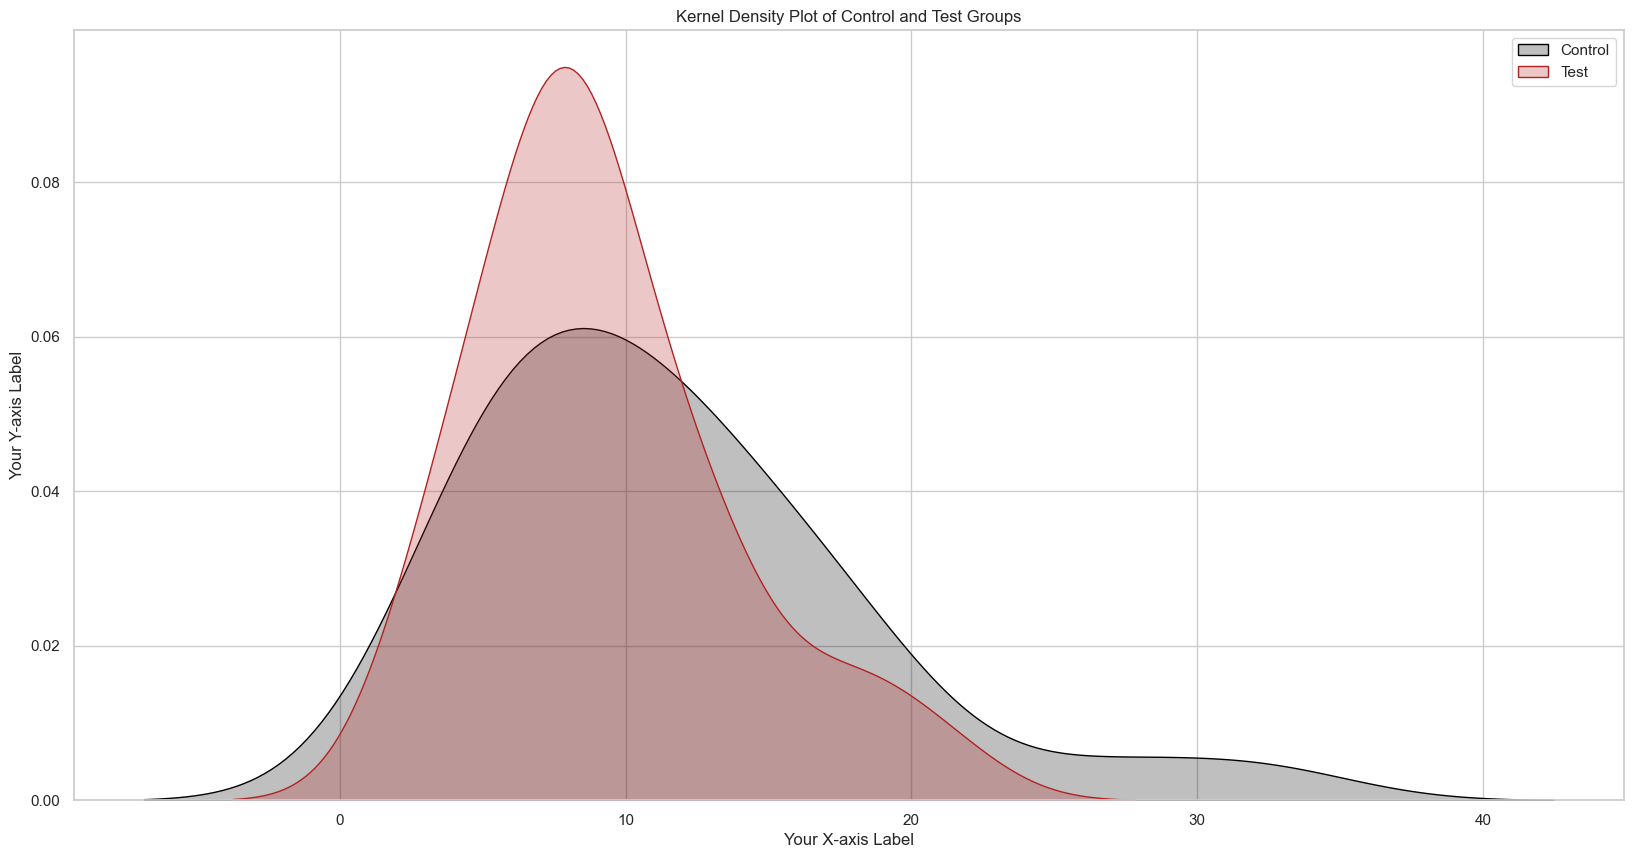

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming control_group and test_group are the datasets you want to plot
plt.figure(figsize=(20, 10))

# Plot KDE for Control group
sns.kdeplot(control_group, label="Control", fill=True, color='#000000')

# Plot KDE for Test group
sns.kdeplot(test_group, label="Test", fill=True, color='#B22222')

# Adding labels and title
plt.xlabel("Your X-axis Label")
plt.ylabel("Your Y-axis Label")
plt.title("Kernel Density Plot of Control and Test Groups")

# Show legend
plt.legend()
plt.show()

<Axes: >

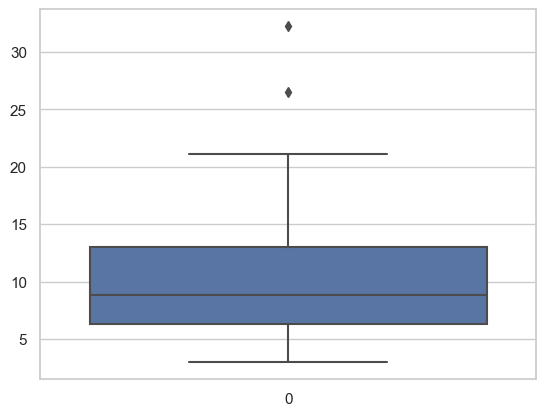

In [68]:
sns.boxplot(data['Conversion Rate(%)'])

In [69]:
print(np.where(data['Conversion Rate(%)']>25))

(array([39, 41], dtype=int64),)


In [70]:
#remove the outliers
df_2 = df_2[df_2['Conversion Rate(%)']<25]
test_g = df_2[df_2['Campaign Name']==1]
control_g = df_2[df_2['Campaign Name']==0]
test_group = test_g['Conversion Rate(%)']
control_group = control_g['Conversion Rate(%)']

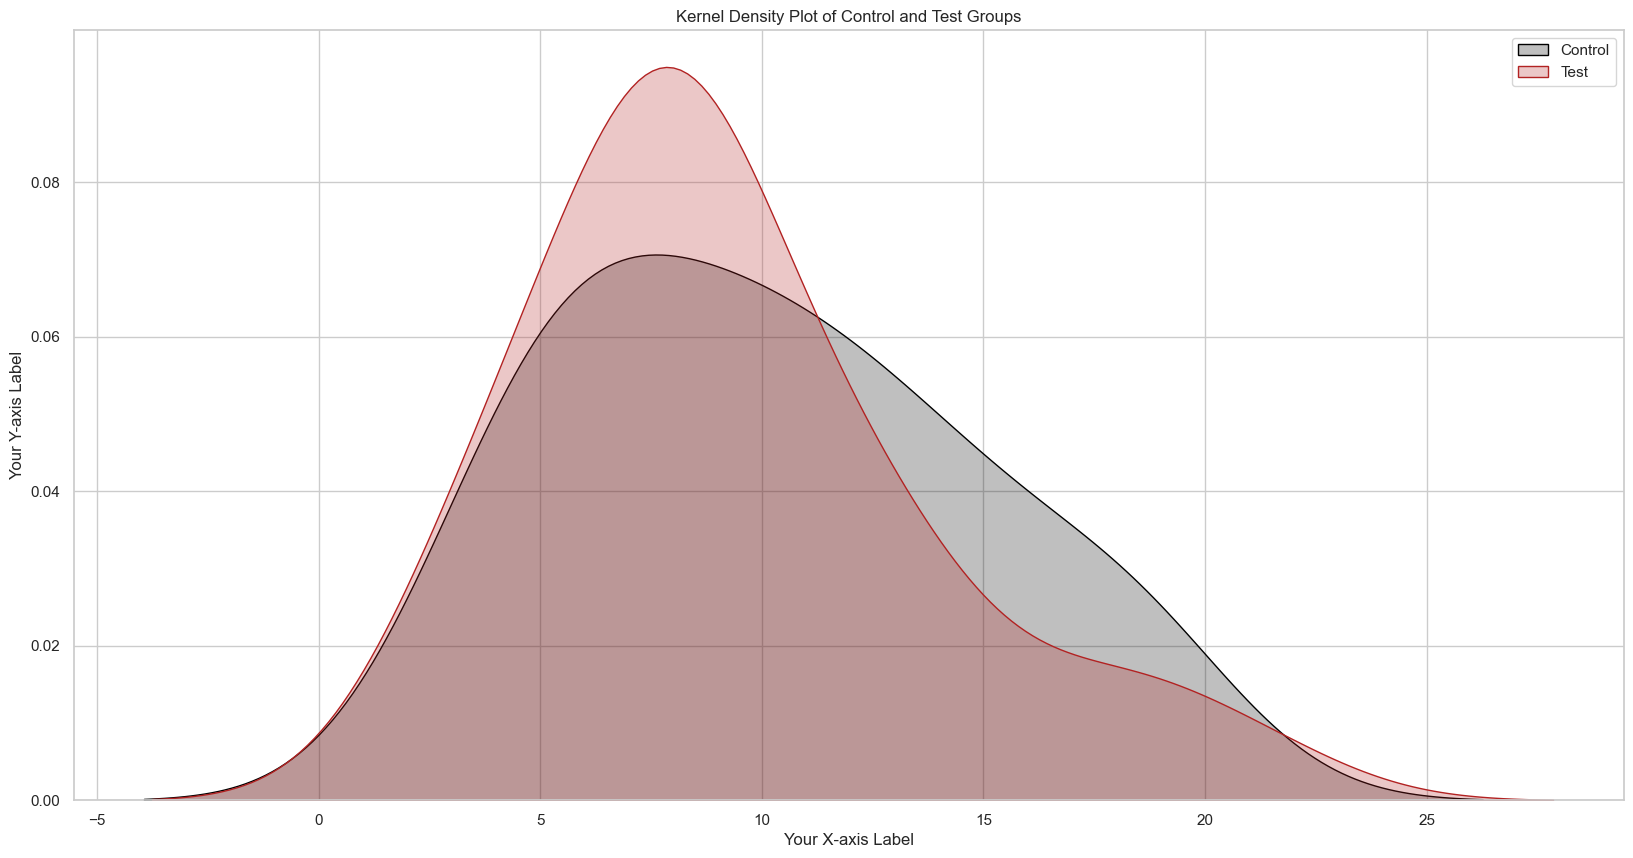

In [72]:
# Assuming control_group and test_group are the datasets you want to plot
plt.figure(figsize=(20, 10))

# Plot KDE for Control group
sns.kdeplot(control_group, label="Control", fill=True, color='#000000')

# Plot KDE for Test group
sns.kdeplot(test_group, label="Test", fill=True, color='#B22222')

# Adding labels and title
plt.xlabel("Your X-axis Label")
plt.ylabel("Your Y-axis Label")
plt.title("Kernel Density Plot of Control and Test Groups")

# Show legend
plt.legend()

# Show the plot
plt.show()

In [73]:
## H0: A = B  - Null Hypothesis
## H1: A != B  - Alternative Hypothesis
# set ⍺ = 0.05
test = stats.ttest_ind(test_group,control_group, equal_var = True)

print(test)

Ttest_indResult(statistic=-0.772161045764481, pvalue=0.4432656246296265)


Conclusion: p value > 0.05, Null Hypothesis is accepted. The new bidding type is not bringing higher conversion rate.